In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

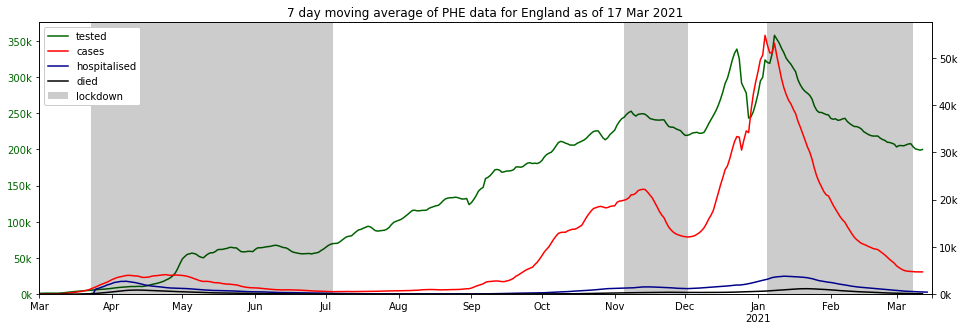

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

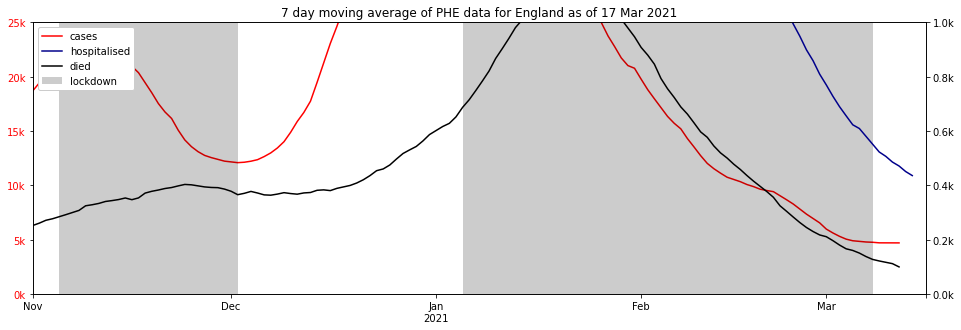

In [3]:
plot_summary(earliest_date='2020-11-01',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=25_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=1_000)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,1224435.0,21493356.0,20268921.0,56286961,2.175344,36.009976,61.814680
1,Northern Ireland,N92000002,63946.0,640801.0,576855.0,1893667,3.376834,30.462325,66.160840
2,Scotland,S92000003,181879.0,1981818.0,1799939.0,5463300,3.329105,32.946003,63.724892
3,Wales,W92000004,289185.0,1157251.0,868066.0,3152879,9.172093,27.532487,63.295420


'partial: 25,273,226 (37.8%), full: 1,759,445'

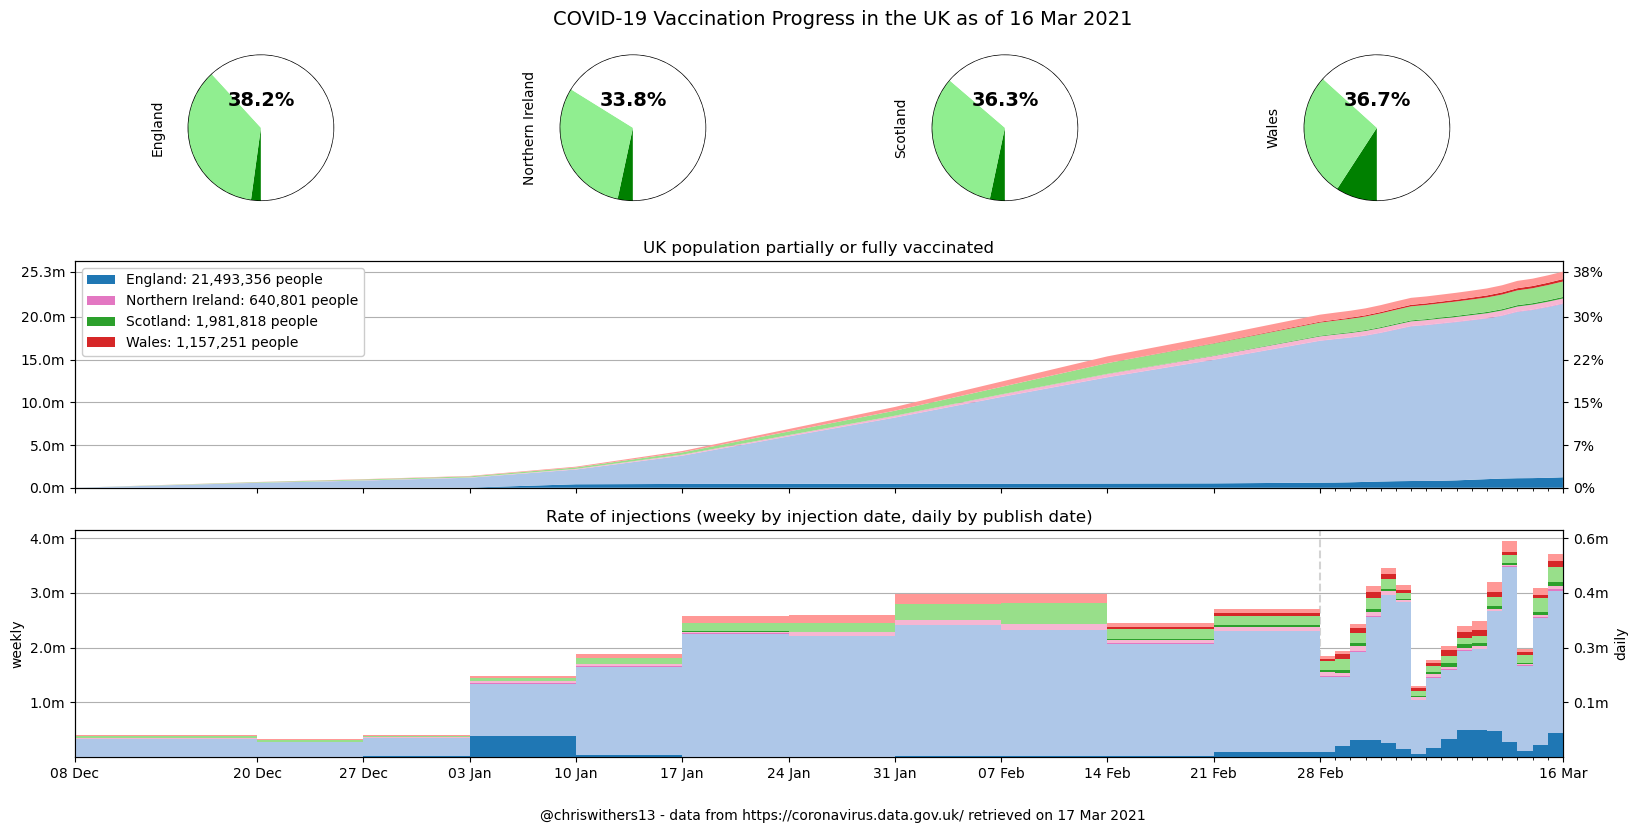

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,16 Mar 21,"+370,842","+62,909","+62,909","+21,493,356","+1,224,435","+1,224,435"
Northern Ireland,16 Mar 21,"+6,782","+5,701","+5,701","+640,801","+63,946","+63,946"
Scotland,16 Mar 21,"+38,311","+10,987","+10,987","+1,981,818","+181,879","+181,879"
Wales,16 Mar 21,"+17,385","+16,202","+16,202","+1,157,251","+289,185","+289,185"


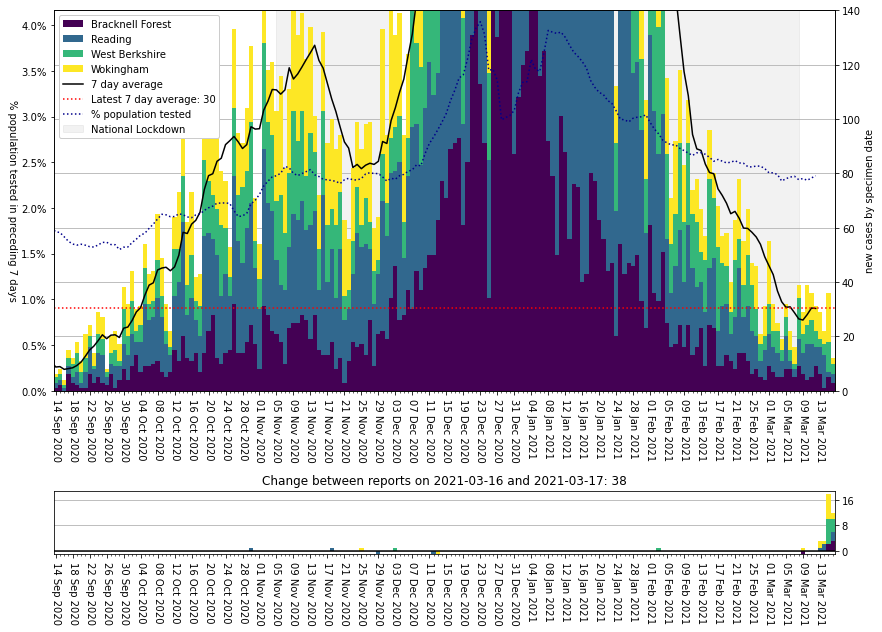

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

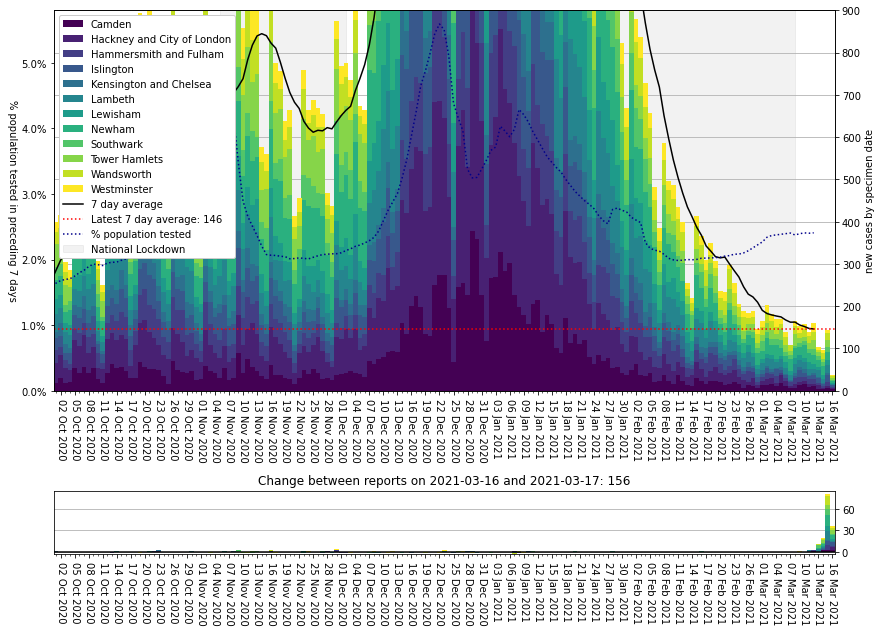

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,164.778864,119.0,2021-03-16
E08000016,Barnsley,162.841380,402.0,2021-03-16
E07000236,Redditch,145.435780,124.0,2021-03-16
E06000010,"Kingston upon Hull, City of",143.969081,374.0,2021-03-16
S12000011,East Renfrewshire,132.942531,127.0,2021-03-16
E06000013,North Lincolnshire,126.529380,218.0,2021-03-16
E08000018,Rotherham,123.958690,329.0,2021-03-16
S12000049,Glasgow City,121.304018,768.0,2021-03-16
E06000031,Peterborough,121.131816,245.0,2021-03-16


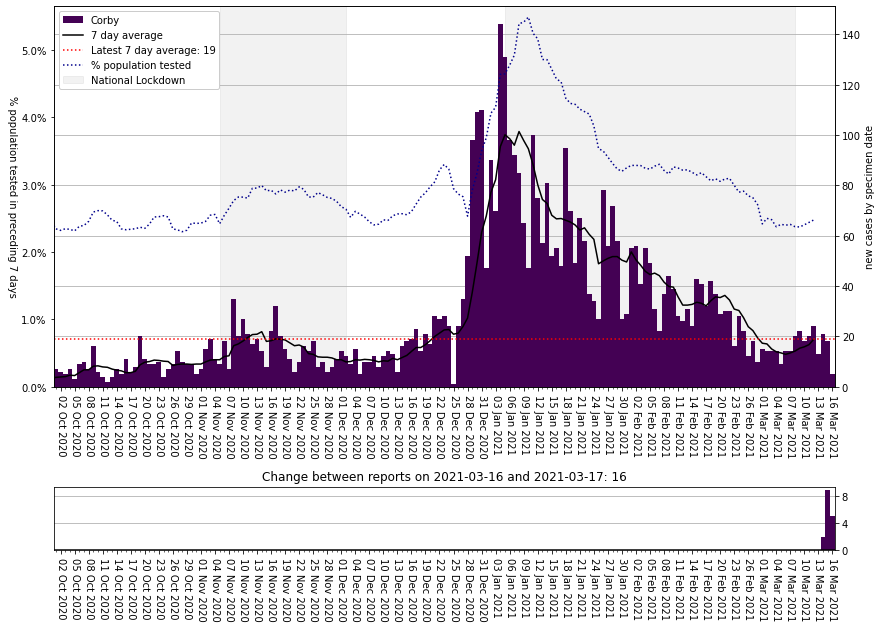

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000049,Glasgow City,121.304018,768.0,2021-03-16
E08000025,Birmingham,65.246940,745.0,2021-03-16
E08000035,Leeds,88.130832,699.0,2021-03-16
E08000032,Bradford,117.456130,634.0,2021-03-16
E08000019,Sheffield,94.211708,551.0,2021-03-16
E08000003,Manchester,79.224683,438.0,2021-03-16
E08000016,Barnsley,162.841380,402.0,2021-03-16
E08000034,Kirklees,85.950699,378.0,2021-03-16
S12000050,North Lanarkshire,110.144418,376.0,2021-03-16


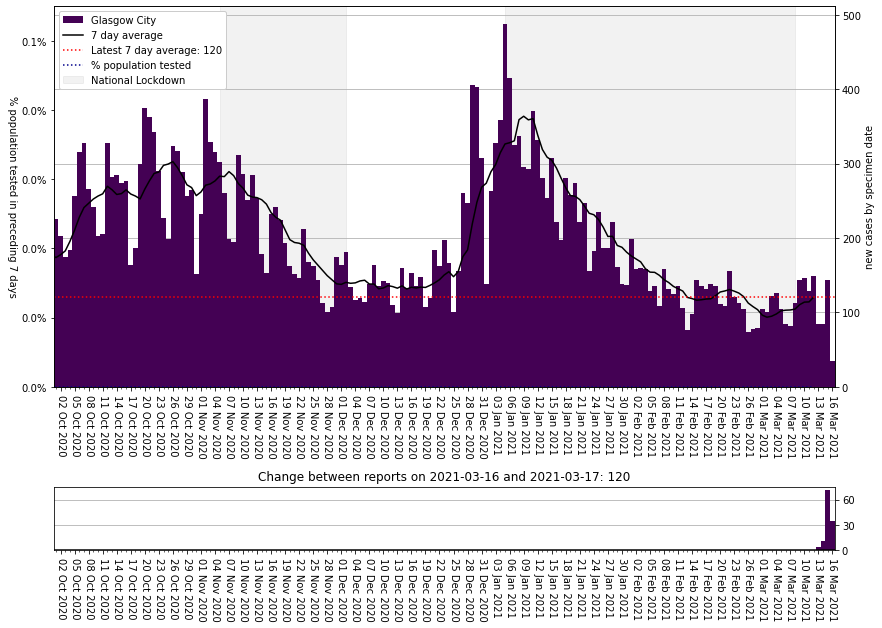

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

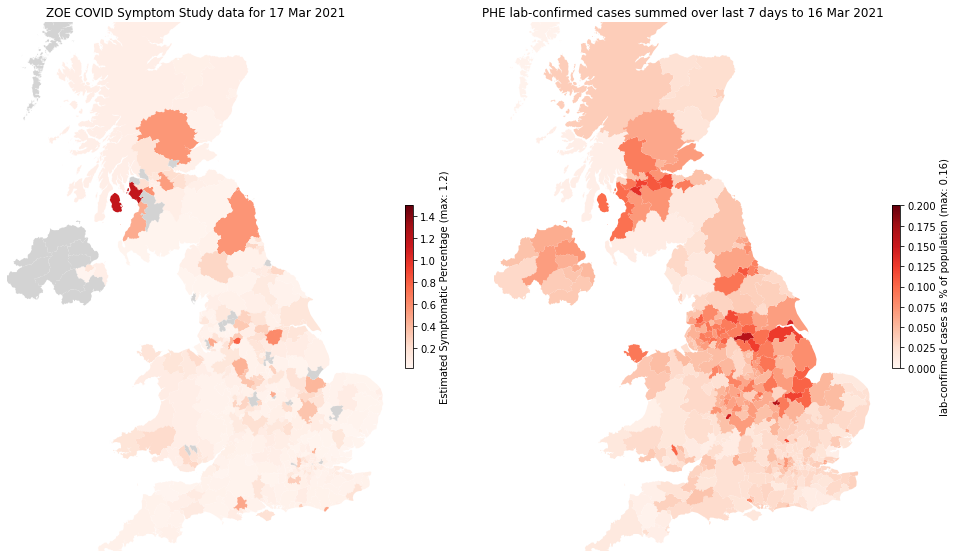

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

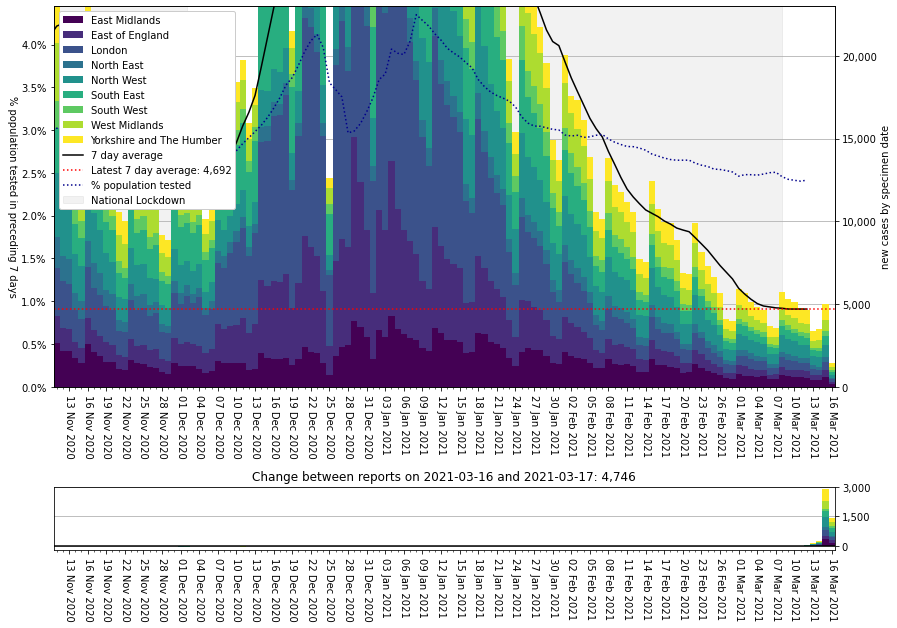

In [16]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-11-11')

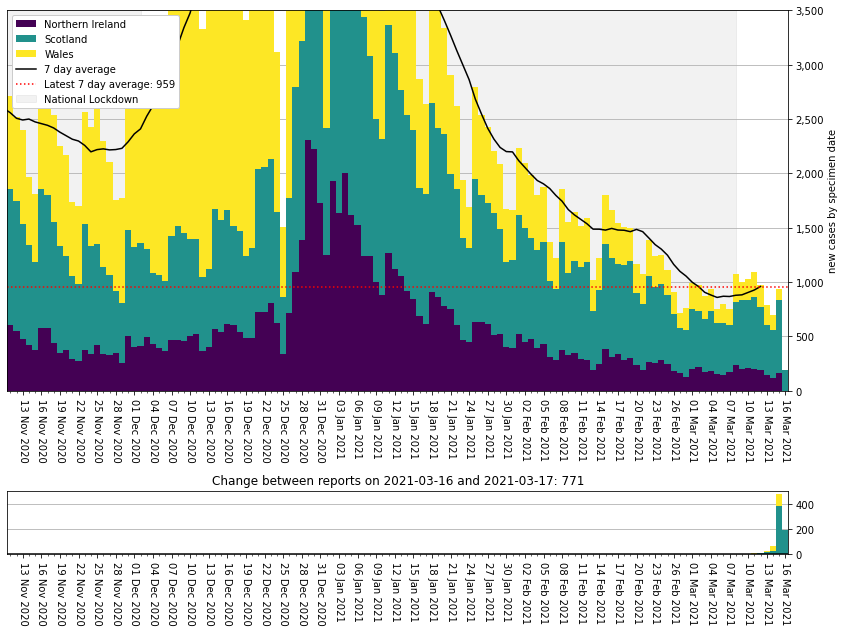

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-11-11')